<h1 align=center><font size=5>Análisis de datos con Python</font></h1>

<h1>Módulo 3: Desarrollo de modelos</h1>

In [45]:
# Importando librerias
import numpy as np
import pandas as pd

datadf = pd.read_csv("data.csv",sep = ";")
datadf.head()


,id,Gender,Python_user,R_user,Age,Publications,Tasks,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Year
0,1,female,yes,yes,38.0,33,Postdoctoral_research,5,5,5,3,3,2,5,4,5,4,2004
1,2,male,no,yes,36.0,31,Postdoctoral_research,3,4,4,4,4,3,5,4,4,2,2002
2,3,male,yes,no,30.0,19,PhD_Student,5,5,5,4,5,4,5,4,5,5,2016
3,4,female,yes,no,42.0,29,Phd_Supervisor,4,4,4,3,3,4,4,2,3,4,2007
4,5,female,yes,no,37.0,31,PhD_Student,4,3,5,2,4,4,5,3,5,4,2001


### 1. Regresión Lineal

$$
 Y: Variable \ Respuesta \\
 X: Variable \ Predictora 
$$


$$
Y = a + b  X
$$

#### Usando la libreria statsmodels


In [46]:
### Influence Gender, Python_user, R_user, Age variables in the number of publications
# Import libraries/modules
import numpy as np
import statsmodels.formula.api as smf

# Remove line in data where Age=NaN
datadf = datadf[np.isfinite(datadf['Age'])]

# Remove line in data where Python_user=NaN
datadf = datadf.dropna(subset=['Python_user'])

# Replace values
datadf['Gender'] = datadf['Gender'].replace(['male','female'],[0,1])

datadf['Python_user'] = datadf['Python_user'].replace(['no','yes'],[0,1])

datadf['R_user'] = datadf['R_user'].replace(['no','yes'],[0,1])

In [47]:
# Fit regression model (using the natural log of one of theregressors)
results = smf.ols('Publications ~  Age', data=datadf).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Publications   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.65e-23
Time:                        21:42:02   Log-Likelihood:                -631.96
No. Observations:                 197   AIC:                             1268.
Df Residuals:                     195   BIC:                             1274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7677      2.863     -0.967      0.3

In [50]:
X = datadf[['Age']]
Y = datadf['Publications']
Ypred = results.predict(X)
print(Ypred[0:5])
print(Y[0:5])

0    30.397073
1    28.651560
2    23.415022
3    33.888098
4    29.524317
dtype: float64
0    33
1    31
2    19
3    29
4    31
Name: Publications, dtype: int64


#### Usando la libreria sklearn

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()
X = datadf[['Age']]
Y = datadf['Publications']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lm.coef_

array([0.87275633])

In [54]:
lm.intercept_

-2.7676673968482355

In [55]:
Ypred=lm.predict(X)
print(Ypred[0:5])   
print(Y[0:5])

[30.39707301 28.65156035 23.4150224  33.88809831 29.52431668]
0    33
1    31
2    19
3    29
4    31
Name: Publications, dtype: int64


### 2. Regresión Múltiple

$$
Y: Variable \ Respuesta\\
X_1: Variable\ Predictora \ 1\\
X_2: Variable\ Predictora \ 2\\
X_3: Variable\ Predictora \ 3\\
X_4: Variable\ Predictora \ 4\\
$$

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

#### Usando la libreria statsmodels

In [56]:
# Fit regression model (using the natural log of one of theregressors)
results = smf.ols('Publications ~ Gender + Python_user + R_user + Age', data=datadf).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Publications   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     34.11
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.70e-21
Time:                        21:43:34   Log-Likelihood:                -629.64
No. Observations:                 197   AIC:                             1269.
Df Residuals:                     192   BIC:                             1286.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.2272      2.940     -1.438      

In [57]:
X = datadf[['Gender', 'Python_user' , 'R_user' , 'Age']]
Y = datadf['Publications']
Ypred = results.predict(X)
print(Ypred[0:5])
print(Y[0:5])

0    32.037249
1    28.734196
2    22.187150
3    33.720025
4    29.389502
dtype: float64
0    33
1    31
2    19
3    29
4    31
Name: Publications, dtype: int64


#### Usando la libreria sklearn

In [58]:
lm = LinearRegression()
X = datadf[['Gender', 'Python_user' , 'R_user' , 'Age']]
Y = datadf['Publications']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
lm.coef_

array([1.13962077, 0.43122311, 1.78164218, 0.86610446])

In [60]:
lm.intercept_

-4.227206588498323

In [62]:
Ypred=lm.predict(X)
print(Ypred[0:5])   
print(Y[0:5])

[32.03724904 28.73419624 22.18715039 33.72002471 29.3895024 ]
0    33
1    31
2    19
3    29
4    31
Name: Publications, dtype: int64


### 3.- Evaluar el modelos usando Visualización

In [72]:
# import the visualization package: seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline 

<h3>Regression Plot</h3>

(0, 72.99942179043263)

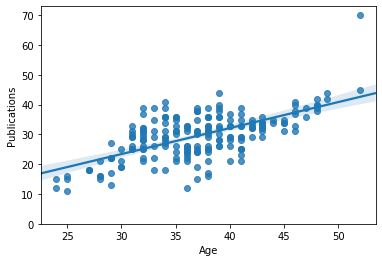

In [88]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.regplot(x="Age", y="Publications", data=datadf)
plt.ylim(0,)

(0, 72.99942179043263)

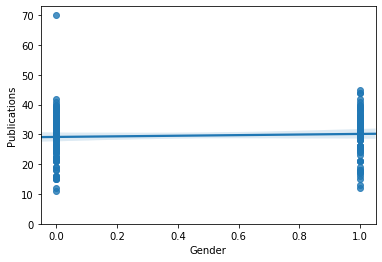

In [89]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.regplot(x="Gender", y="Publications", data=datadf)
plt.ylim(0,)

(0, 72.99942179043263)

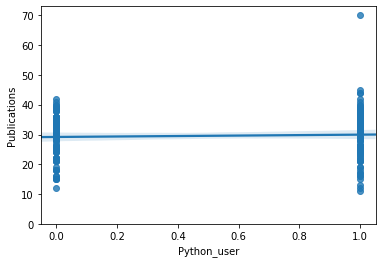

In [90]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.regplot(x="Python_user", y="Publications", data=datadf)
plt.ylim(0,)

(0, 72.99942179043263)

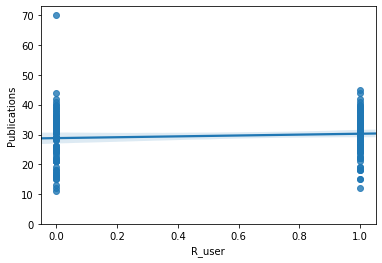

In [91]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.regplot(x="R_user", y="Publications", data=datadf)
plt.ylim(0,)

<h3>Residual Plot</h3>


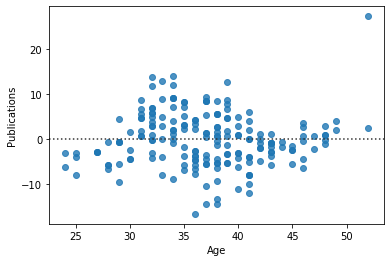

In [84]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.residplot(datadf['Age'], datadf['Publications'])
plt.show()


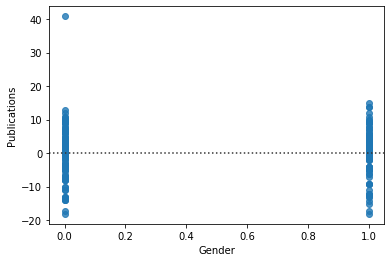

In [87]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
sns.residplot(datadf['Gender'], datadf['Publications'])
plt.show()

<h3>Multiple Linear Regression</h3>

In [93]:
X = datadf[['Gender', 'Python_user' , 'R_user' , 'Age']]
Ypred = lm.predict(X)

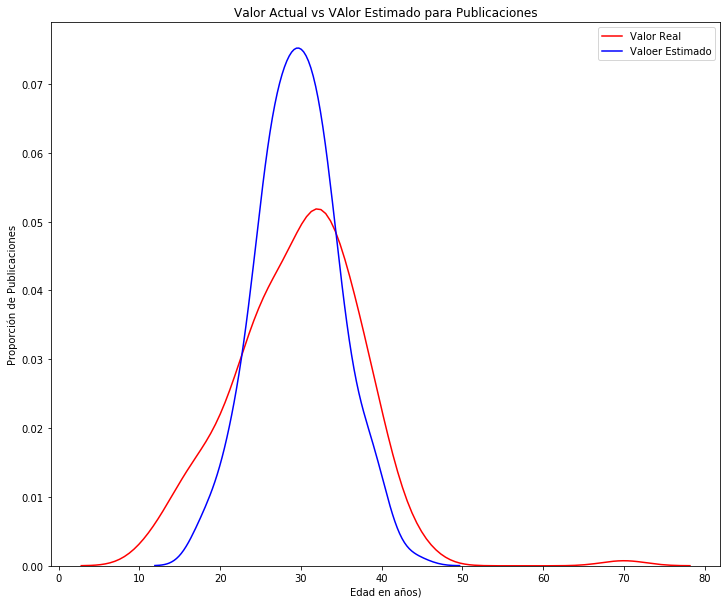

In [98]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(datadf['Publications'], hist=False, color="r", label="Valor Real")
sns.distplot(Ypred, hist=False, color="b", label="Valoer Estimado" , ax=ax1)
plt.title('Valor Actual vs VAlor Estimado para Publicaciones')
plt.xlabel('Edad en años)')
plt.ylabel('Proporción de Publicaciones')
plt.show()
plt.close()

### 3: Regresion Polinomica y Pipelines

<center><b>Cuadratica - 2nd orden</b></center>
$$
Ypred = b_0 + b_1 X +b_2 X^2 \\
$$


<center><b>Cúbica - 3rd orden</b></center>
$$
Ypred = b_0 + b_1 X +b_2 X^2 +b_3 X^3\\
$$


<center><b>Un orden mayor</b>:</center>
$$
Ypred = b_0 + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$

In [201]:
# Defino los valores
X = datadf['Age']
Y = datadf['Publications']
# Here we use a polynomial of the 3rd order (cubic) 
coefficients = np.polyfit(X, Y, 3) # retorno listado de coeficientes
coefficients

array([ 7.30297354e-03, -8.20177576e-01,  3.09330412e+01, -3.61949993e+02])

In [203]:
mod_poly = np.poly1d(f)
mod_poly

poly1d([ 7.30297354e-03, -8.20177576e-01,  3.09330412e+01, -3.61949993e+02])

In [204]:
print(mod_poly)

          3          2
0.007303 x - 0.8202 x + 30.93 x - 361.9


In [205]:
def plot_polly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(20, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Publications')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Publications')

    plt.show()
    plt.close()

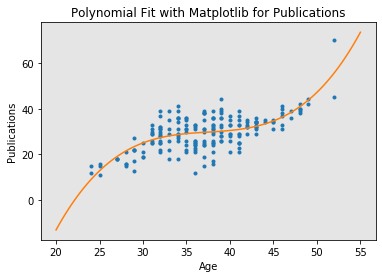

In [206]:
plot_polly(mod_poly, X, Y, 'Age')

In [207]:
np.polyfit(X, Y, 3)

array([ 7.30297354e-03, -8.20177576e-01,  3.09330412e+01, -3.61949993e+02])

#### Polinomios multivariados 

$$
Ypred = b_0 + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [110]:
X_pr = pr.fit_transform(X)

In [111]:
X.shape

(197, 4)

In [112]:
X_pr.shape

(197, 15)

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [114]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [115]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [ ]:
pipe.fit(X,Y)

In [ ]:
Ypipe=pipe.predict(X)
Ypipe[0:5]

#### 4.- Measures for In-Sample Evaluation</h2>

<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

##### Model 1: Simple Linear Regression

In [184]:
#highway_mpg_fit
X = datadf[['Age']]
lm.fit(X, Y)
# Find the R^2
print('El R-square es: ', lm.score(X, Y))

El R-square es:  0.40145999950198297


In [185]:
Ypred=lm.predict(X)
print('La salida de los 4 primeros valores predecidos : ', Ypred[0:4])

La salida de los 4 primeros valores predecidos :  [30.39707301 28.65156035 23.4150224  33.88809831]


In [186]:
from sklearn.metrics import mean_squared_error

In [187]:
mse = mean_squared_error(datadf['Publications'], Ypred)
print('EL MSE de la variable Publications y  predicted value es: ', mse)

EL MSE de la variable Publications y  predicted value es:  35.80033861001401


##### Model 2: Multiple Linear Regression


In [188]:
X = datadf[['Gender', 'Python_user' , 'R_user' , 'Age']]

# fit the model 
lm.fit(X, datadf['Publications'])
# Find the R^2
print('The R-square is: ', lm.score(X, datadf['Publications']))

The R-square is:  0.4153843152956638


In [189]:
Y_predict_multifit = lm.predict(X)
print('EL MSE de la variable Publications y  predicted value es: ', \
      mean_squared_error(datadf['Publications'], Y_predict_multifit))

EL MSE de la variable Publications y  predicted value es:  34.9674866370268


#### Model 3: Polynomial Fit

In [190]:
from sklearn.metrics import r2_score

In [195]:
X = datadf['Age']
Y = datadf['Publications']

#print(p(X))
r_squared = r2_score(Y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.49738753510176037


In [192]:
mean_squared_error(datadf['Publications'], p(X))

30.062646469741455

### Part 5: Prediction and Decision Making

In [167]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [169]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [172]:
X = datadf[['Age']]
Y = datadf['Publications']

lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
y_pred=lm.predict(new_input)
y_pred[0:5]

array([-1.89491107, -1.02215474, -0.14939842,  0.72335791,  1.59611424])

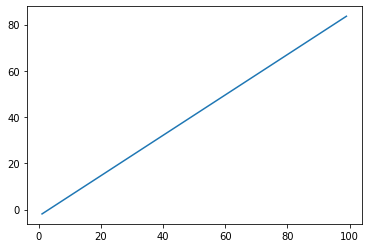

In [175]:
plt.plot(new_input, y_pred)
plt.show()